# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

### **Import Libraries and Settings**

In [1]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')

# **Task 1 : Conversion Rate Analysis Based on Income, Spending and Age**

## Data Understanding & Initial Transformation

In [3]:
df.sample(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1021,1021,2445,1974,S3,Bertunangan,28440000.0,1,0,07-07-2013,87,38000,1000,24000,0,0,0,1,2,0,3,8,0,0,0,0,0,0,3,11,0
509,509,8939,1959,S1,Cerai,61250000.0,0,1,16-12-2012,49,382000,138000,65000,60000,26000,59000,6,5,2,12,5,0,0,0,0,0,0,3,11,0
1586,1586,4764,1952,S2,Bertunangan,40442000.0,1,1,19-08-2012,52,45000,12000,52000,25000,22000,13000,4,3,1,4,7,0,0,0,0,0,0,3,11,1
445,445,10364,1959,S1,Cerai,23295000.0,0,0,13-07-2013,72,0,0,1000,2000,12000,5000,1,1,0,2,8,0,0,0,0,0,0,3,11,0
1478,1478,5286,1987,S2,Lajang,41020000.0,0,0,28-10-2013,68,112000,1000,54000,7000,7000,36000,1,3,2,4,3,0,0,0,0,0,0,3,11,0
82,82,5346,1973,D3,Menikah,23559000.0,1,0,03-07-2013,87,25000,5000,19000,7000,0,23000,3,3,0,3,7,0,0,0,0,0,0,3,11,0
1467,1467,7521,1952,S1,Bertunangan,83844000.0,0,0,12-05-2013,57,901000,31000,345000,75000,31000,191000,1,4,4,11,1,0,0,1,0,0,0,3,11,0
1253,1253,961,1972,S1,Menikah,74716000.0,0,1,12-09-2013,92,133000,27000,421000,13000,195000,71000,2,7,3,5,4,0,0,0,0,0,0,3,11,0
1452,1452,6246,1953,S1,Lajang,73892000.0,0,0,13-11-2013,40,703000,102000,601000,0,58000,43000,1,3,11,8,1,0,0,0,0,0,0,3,11,1
1369,1369,10476,1958,S1,Menikah,67267000.0,0,1,13-05-2014,0,134000,11000,59000,15000,2000,30000,1,3,2,5,2,0,0,0,0,0,0,3,11,0


In [4]:
# Initial transformation
df.drop('Unnamed: 0', axis=1, inplace=True)
df.sort_index(inplace=True)

### **Data Information**

In [5]:
df.shape

(2240, 29)

- The dataset have 2240 rows and 29 columns

In [6]:
# Check data information
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=list_item, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage,Duplicated Values,Unique Values,Unique Sample
0,ID,int64,0,0.00,0,2240,"[5524, 2174, 4141, 6182, 5324]"
1,Year_Birth,int64,0,0.00,0,59,"[1957, 1954, 1965, 1984, 1981]"
2,Education,object,0,0.00,0,5,"[S1, S3, S2, SMA, D3]"
3,Marital_Status,object,0,0.00,0,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
4,Income,float64,24,1.07,0,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000.0, 58293000.0]"
5,Kidhome,int64,0,0.00,0,3,"[0, 1, 2]"
6,Teenhome,int64,0,0.00,0,3,"[0, 1, 2]"
7,Dt_Customer,object,0,0.00,0,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014]"
8,Recency,int64,0,0.00,0,100,"[58, 38, 26, 94, 16]"
9,MntCoke,int64,0,0.00,0,776,"[635000, 11000, 426000, 173000, 520000]"


**Feature Descriptions**

- `ID`: Unique identifier for each customer
- `Year_Birth`: Customer's year of birth
- `Complain`: 1 if the customer complained in the last 2 years
- `Dt_Customer`: Date of customer's registration with the company (joining date as a member)
- `Education`: Customer's level of education
- `Marital_Status`: Customer's marital status
- `Kidhome`: Number of small children in the customer's household
- `Teenhome`: Number of teenagers in the customer's household
- `Income`: Customer's household income per year
- `MntFishProducts`: Amount spent on fish products in the last 2 years
- `MntMeatProducts`: Amount spent on meat products in the last 2 years
- `MntFruits`: Amount spent on fruit products in the last 2 years
- `MntSweetProducts`: Amount spent on sweet products in the last 2 years
- `MntWines`: Amount spent on wine products in the last 2 years
- `MntGoldProds`: Amount spent on gold products in the last 2 years
- `NumDealsPurchases`: Number of purchases made with a discount
- `NumCatalogPurchases`: Number of purchases made using a catalog (buying items to be shipped via mail)
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebPurchases`: Number of purchases made through the company's website
- `NumWebVisitsMonth`: Number of visits to the company's website in the last month
- `Recency`: Number of days since the customer's last purchase
- `Response`: 1 if the customer responded to the offer in the last campaign, 0 if not

- Other than `Dt_Customer` that we will convert to datetime, every features have the correct data types.

In [7]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

- `Income` column have a small percentage missing values, we will need to handle that with imputation based on the distribution.

<Axes: xlabel='Income', ylabel='Count'>

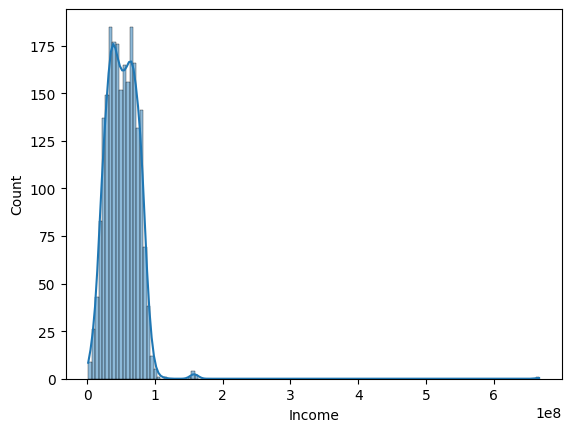

In [9]:
# Checking income distribution for imputation method
sns.histplot(data=df, x='Income', kde=True)

Since the distribution is positive skewed then we will impute the missing values with median that is robust to outliers.

In [10]:
df['Income'] = df['Income'].fillna(df['Income'].median())

### Columns Grouping Based on Data Type

In [11]:
# Check dataframe values
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1304,6055,1979,S1,Menikah,71626000.0,0,0,2012-11-01,94,546000,72000,376000,94000,145000,72000,1,5,5,8,3,0,1,0,0,0,0,3,11,0
1777,164,1977,S3,Menikah,28973000.0,0,0,2012-10-13,59,206000,0,46000,3000,2000,12000,2,5,1,5,8,0,0,0,0,0,0,3,11,0
446,5954,1972,S2,Cerai,42618000.0,1,0,2013-10-09,92,76000,14000,74000,13000,5000,10000,2,5,0,4,8,0,0,0,0,0,0,3,11,0
1939,2478,1973,S1,Menikah,25410000.0,1,0,2013-08-31,48,2000,2000,4000,13000,13000,4000,1,1,0,4,4,0,0,0,0,0,0,3,11,0
534,8724,1982,S1,Lajang,28567000.0,1,0,2013-06-17,57,11000,3000,22000,2000,2000,6000,2,2,0,3,6,0,0,0,0,0,0,3,11,0
1131,606,1967,S1,Lajang,25930000.0,1,1,2013-10-10,87,6000,1000,2000,2000,0,4000,1,1,0,2,7,0,0,0,0,0,0,3,11,0
1307,4394,1965,S3,Menikah,81051000.0,0,0,2014-05-23,43,1142000,29000,249000,38000,29000,14000,1,5,5,12,2,0,1,1,0,0,0,3,11,0
625,3641,1976,S1,Menikah,13624000.0,1,0,2013-01-20,93,10000,2000,15000,2000,1000,6000,2,2,0,3,6,0,0,0,0,0,0,3,11,0
1845,7872,1975,S3,Menikah,86836000.0,0,0,2012-09-12,7,179000,21000,273000,0,21000,63000,1,6,10,6,5,1,0,1,1,0,0,3,11,1
1763,2797,1977,S1,Menikah,72117000.0,0,1,2013-08-20,34,707000,20000,171000,65000,60000,50000,1,9,7,9,5,0,0,0,0,0,0,3,11,0


In [12]:
# # Another way of checking unique values (before grouping based on data types)
# for x in df.columns:
#     unique_values_check = list(df[x].unique())
#     unique_values_check.sort()

#     print(f"{x}")
#     print(f"{df[x].unique()}")
#     print()

#     # if len(unique_values_check) >= 10:
#     #     unique_values_check = unique_values_check[:10] + ['.....']
#     #     print(unique_values_check)
#     # else:
#     #     print(unique_values_check)
#     # print()

- Categorical columns (10 columns): 
    - `ID` : nominal
    - `Education` : ordinal
    - `Marital_Status` : nominal
    - `AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Complain, Response` : nominal (Binary 0 & 1)

- Numerical/Continuous columns (18 columns)
    - `Year_Birth, Income, Kidhome, Teenhome, 
    Recency, MntCoke, MntFruits, MntMeatProducts, 
    MntFishProducts, MntSweetProducts, MntGoldProds, 
    NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, 
    NumStorePurchases, NumWebVisitsMonth, Z_CostContact, Z_Revenue`

- Date column (1 column) : `Dt_Customer`

In [13]:
# Grouping columns based on data types
cats_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

nums_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

date_cols = ['Dt_Customer']

In [14]:
# Checking every unique values in categorical columns
for col in cats_cols :
    print()
    print(f"{col} : {df[col].unique()}")


ID : [5524 2174 4141 ... 7270 8235 9405]

Education : ['S1' 'S3' 'S2' 'SMA' 'D3']

Marital_Status : ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']

AcceptedCmp1 : [0 1]

AcceptedCmp2 : [0 1]

AcceptedCmp3 : [0 1]

AcceptedCmp4 : [0 1]

AcceptedCmp5 : [0 1]

Complain : [0 1]

Response : [1 0]


In [15]:
# Checking every unique values in numerical columns
for col in nums_cols :
    print()
    print(f"{col} : {df[col].unique()}")


Year_Birth : [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]

Income : [58138000. 46344000. 71613000. ... 56981000. 69245000. 52869000.]

Kidhome : [0 1 2]

Teenhome : [0 1 2]

Recency : [58 38 26 94 16 34 32 19 68 11 59 82 53 23 51 20 91 86 41 42 63  0 69 89
  4 96 56 31  8 55 37 76 99  3 88 80 72 24 92 39 29  2 54 57 30 12 18 75
 90  1 25 40  9 87  5 95 48 70 79 45 84 44 43 35 15 17 46 27 74 85 65 13
 83 10 21 61 73 47 36 49 28 64 98 78 77 81 14 52 93 50 60 66 97 62  6 33
 67 22 71  7]

MntCoke : [ 635000   11000  426000  173000  520000  235000   76000   14000   28000
    5000    6000  194000  233000    3000 1006000   53000   84000 1012000
    4000   86000    1000  867000  384000  270000   36000  684000    8000
  112000  110000   9600

## Handling Outliers

In [16]:
len(df[nums_cols].columns)

18

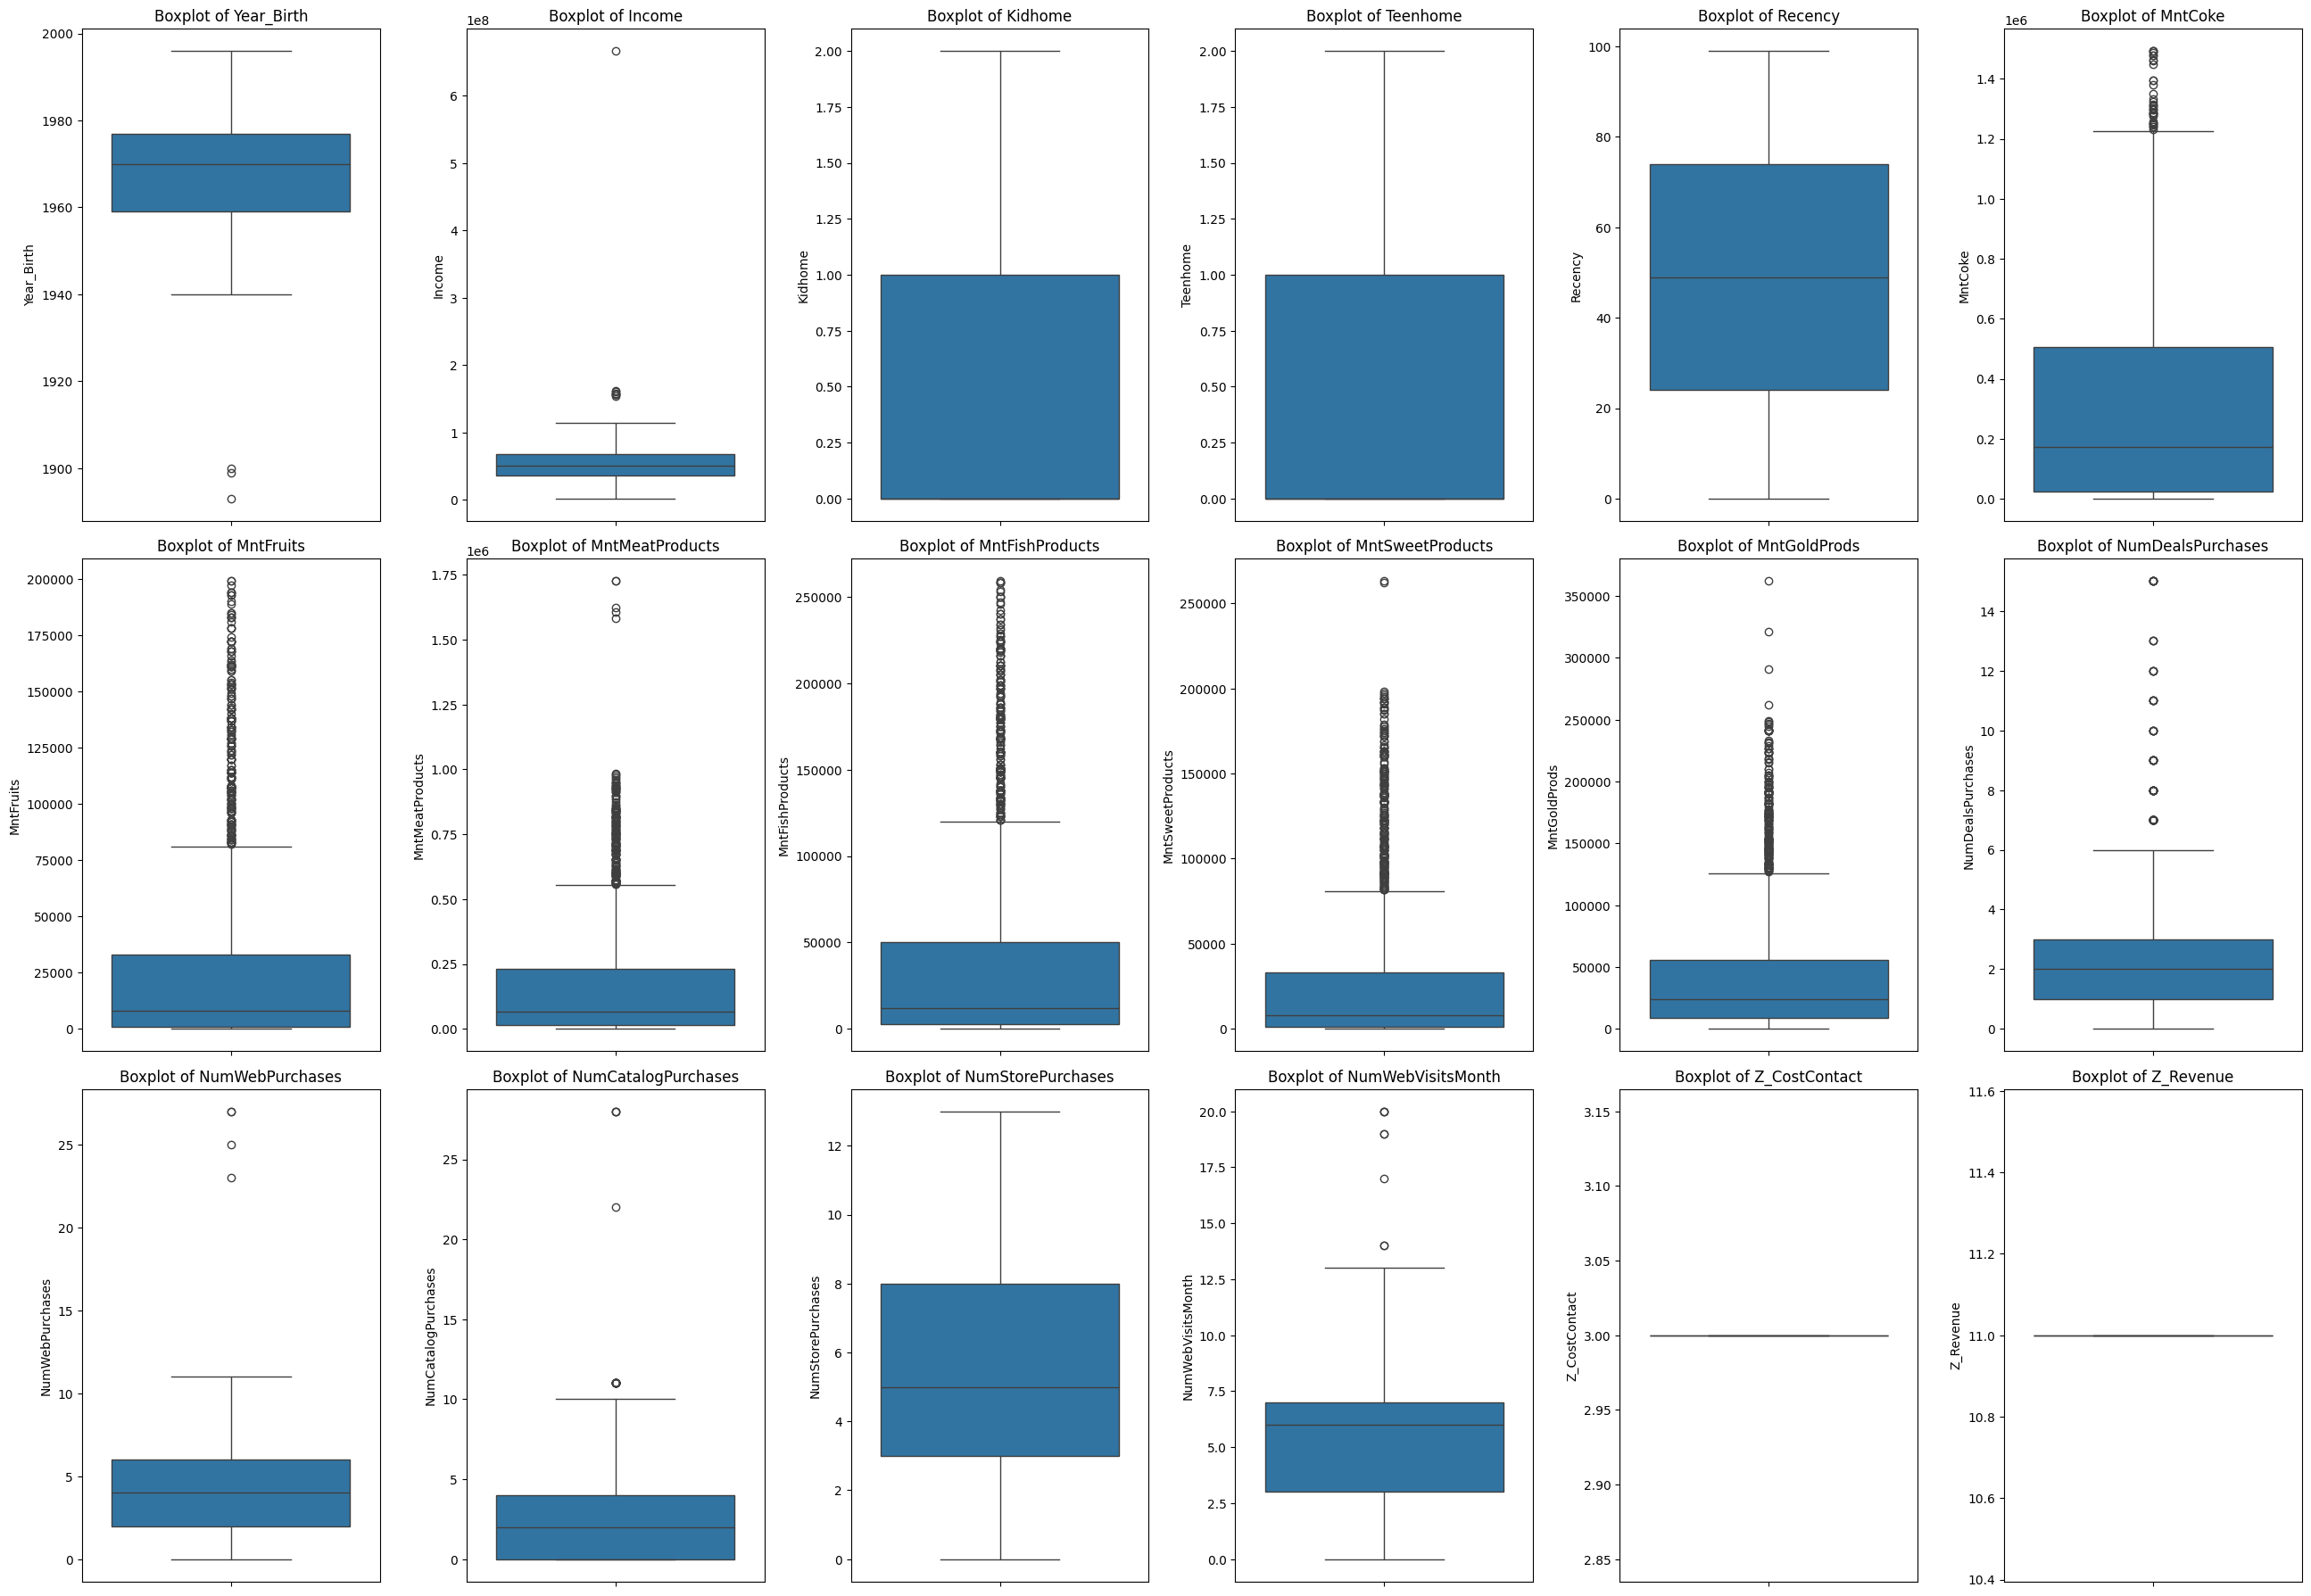

In [17]:
# Boxplot
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(26,18))
ax = ax.flatten()

for i in range (len(nums_cols)) :
    sns.boxplot(data=df, ax=ax[i], y=nums_cols[i], orient='v')
    ax[i].set_title(f'Boxplot of {nums_cols[i]}')

plt.tight_layout()
plt.show()

In [18]:
# Outlier detection for original data

print(f'')
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

check_outliers = pd.DataFrame({
    'Column Name':nums_cols,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data':outlier,
    'Non-Outlier Data':no_outlier
})

check_outliers


Amount of Rows: 2240
Amount of Outlier Rows : 706
Amount of Non-Outlier Rows : 1534
Percentage of Outliers : 31.52



,Column Name,Outlier Exist,Lower Limit,Upper Limit,Outlier Data,Non-Outlier Data
0,Year_Birth,True,1932.0,2004.0,3,2237
1,Income,True,-13587750.0,117416250.0,8,2232
2,Kidhome,False,-1.5,2.5,0,2240
3,Teenhome,False,-1.5,2.5,0,2240
4,Recency,False,-51.0,149.0,0,2240
5,MntCoke,True,-697000.0,1225000.0,35,2205
6,MntFruits,True,-47000.0,81000.0,227,2013
7,MntMeatProducts,True,-308000.0,556000.0,175,2065
8,MntFishProducts,True,-67500.0,120500.0,223,2017
9,MntSweetProducts,True,-47000.0,81000.0,248,1992


**Major Findings:**

There are outliers in the following columns: Year_Birth, Income, MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, and NumWebVisitMonth.

- In the `Year_Birth` column, outliers are below 1932.
- In the `Income` column, outliers are above 117M.
- In the `MntCoke` column, outliers are above 1.2M.
- In the `MntFruits` column, outliers are around 81k.
- In the `MntMeatProducts` column, the farthest outlier is around 1.75M.
- In the `MntFishProducts` column, outliers are around 125k to above 250k.
- In the `MntSweetProducts` column, the farthest outlier is around 250k.
- In the `MntGoldProds` column, the farthest outlier is around 350k.
- In the `NumDealsPurchases` column, the farthest outlier is at 15.
- In the `NumWebPurchases` column, outliers are around 25.
- In the `NumCatalogPurchases` column, the farthest outlier is above 25.
- In the `NumWebVisitsMonth` column, the farthest outlier is at 20.

**Steps to be taken in this initial data pre-Processing:**
- Apply `log transformation` for feature scaling and handling outliers, as this transformation minimizes outliers and potentially helps to obtain a bell-shaped/normal distribution. This choice is maybe appropriate due to the limited data available that is only 2240 rows, and it avoids the need to delete data points.

- Alternatively, cleaning the data by removing outliers based on IQR or Z-score, but it will reduce the amount of available data.

In this case, since we want to keep the data as it is because transforming the whole values in many columns will result in changing the conclusion of our data, so the choice will be removing outliers with Z-score method **but not in all of the columns**, only several columns that have really extreme outliers like `Year_Birth`, `Income`, `MntMeatProducts`, `MntSweetProducts`, `NumWebPurchases`, `NumCatalogPurchases`.

In [19]:
# Outlier handling and create outliers-filtered new dataframe

print(f'Rows before removing outliers: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['Year_Birth','Income', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries
    
df_filtered_outliers = df[filtered_entries]

print(f'Rows after removing outliers: {len(df_filtered_outliers)}')

df_filtered_outliers = df[filtered_entries]
df_filtered_outliers

Rows before removing outliers: 2240
Rows after removing outliers: 1861


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,S2,Bertunangan,62513000.0,0,1,2013-09-09,16,520000,42000,98000,0,42000,14000,2,6,4,10,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,S1,Menikah,34421000.0,1,0,2013-07-01,81,3000,3000,7000,6000,2000,9000,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


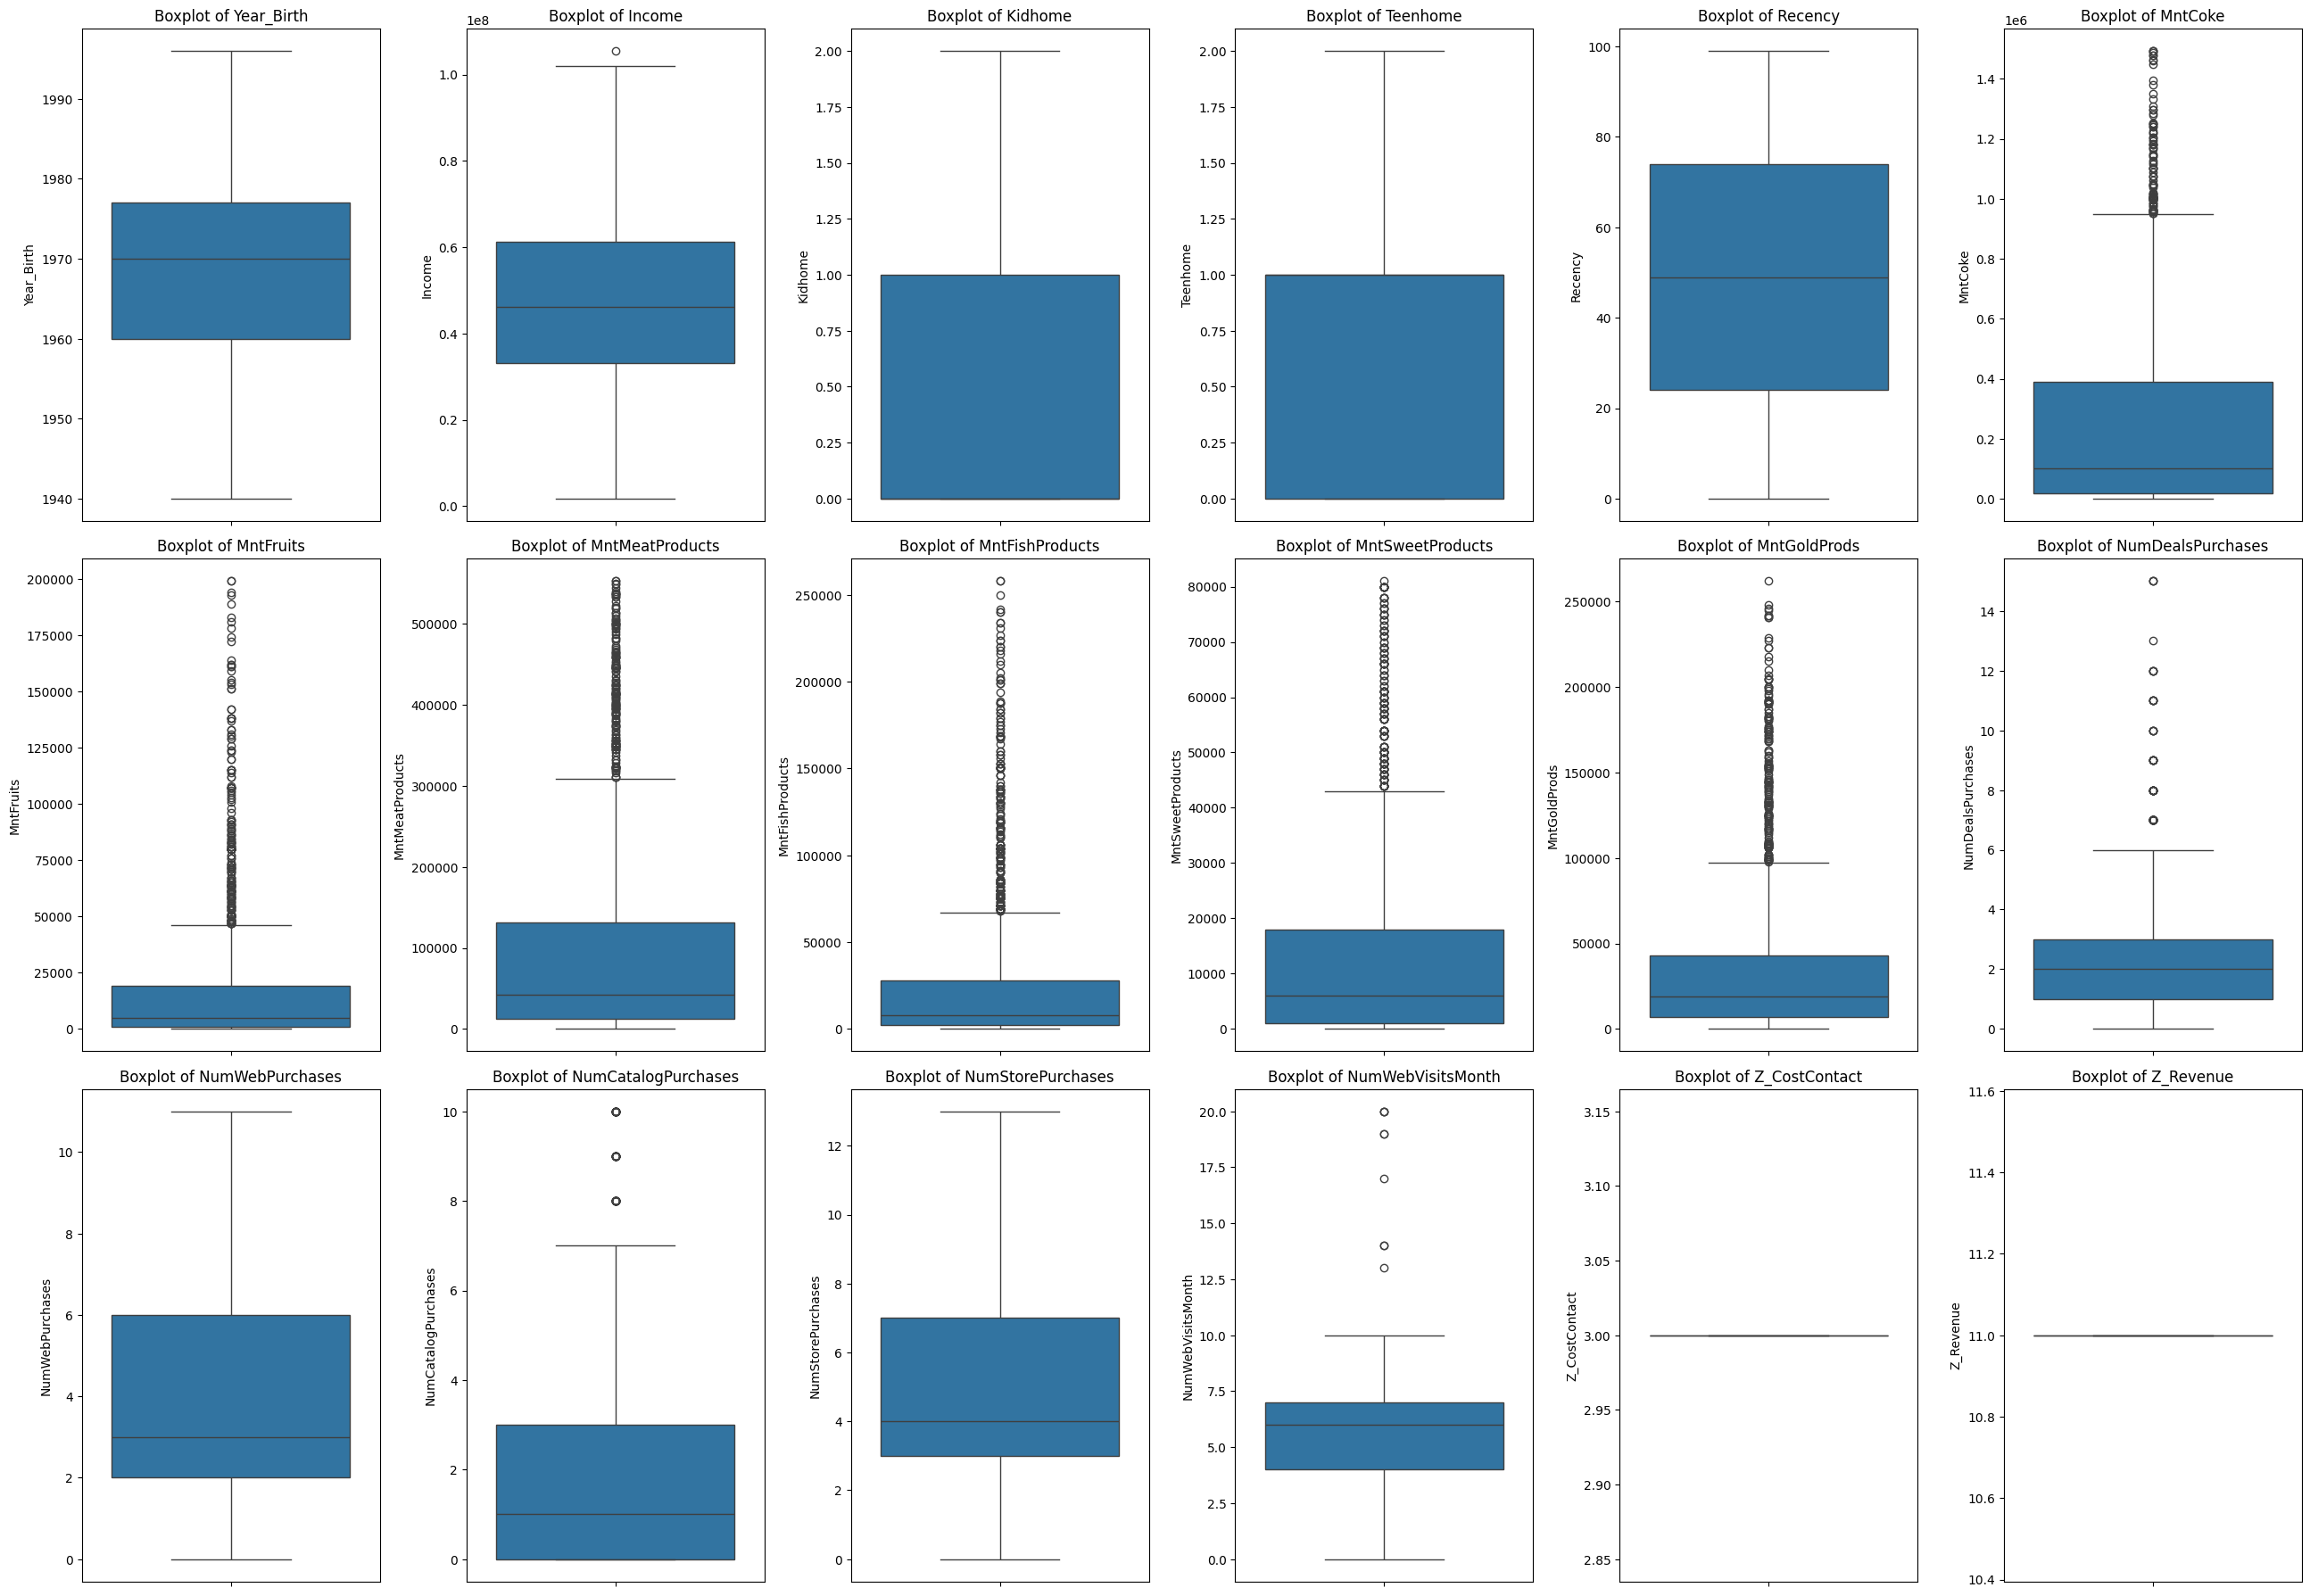

In [20]:
# Check data after filtered
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(26,18))
ax = ax.flatten()

for i in range (len(nums_cols)) :
    sns.boxplot(data=df_filtered_outliers, ax=ax[i], y=nums_cols[i], orient='v')
    ax[i].set_title(f'Boxplot of {nums_cols[i]}')

plt.tight_layout()
plt.show()

## Feature Engineering

### Age Column

The `Age` column is created by calculating the age of each customer based on their birth year and current time.

In [21]:
# Age feature engineering

"""
We don't really have the year information in the data for this purpose, so we will just use the year now
"""
# from datetime import datetime
# year_data = datetime.now().year()

year_data = 2024
df_filtered_outliers['Age'] = year_data - df_filtered_outliers['Year_Birth']

### Age Group Column

The `Age_Group` column is created by grouping the `age` column. But first we need check the distribution of age to help with the grouping range.

<Axes: xlabel='Age', ylabel='Count'>

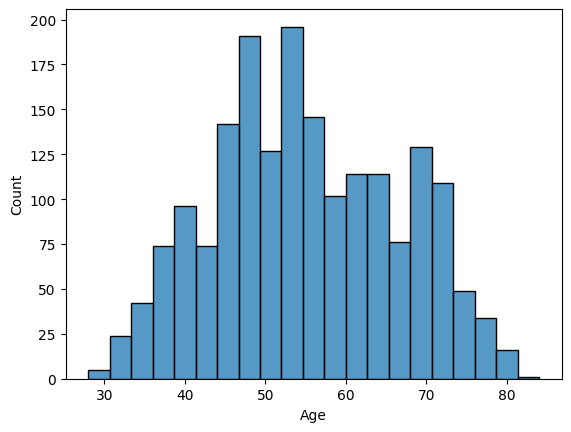

In [22]:
sns.histplot(data=df_filtered_outliers, x='Age')

In [23]:
# Age grouping

def age_group(x):
    if x >= 60:
        return 'Senior Adult'
    elif x >= 40:
        return 'Middle Adult'
    else:
        return 'Young Adult'

df_filtered_outliers['Age_Group'] = df_filtered_outliers['Age'].apply(age_group)

In [24]:
df_filtered_outliers['Age_Group'].value_counts()

Age_Group
Middle Adult    1045
Senior Adult     642
Young Adult      174
Name: count, dtype: int64

### Num_Child Column

The `Num_Child` column is created by summing the values of Kidhome and Teenhome, representing the total number of dependents or children a customer has.

In [25]:
# Number of child the customer have feature engineering

df_filtered_outliers['Num_Child'] = df_filtered_outliers['Kidhome'] + df_filtered_outliers['Teenhome']

In [26]:
df_filtered_outliers['Num_Child'].value_counts()

Num_Child
1    1037
2     410
0     362
3      52
Name: count, dtype: int64

### Membership_Duration Column

The `Membership_Duration` column represents duration of customer membership in year.

In [27]:
df_filtered_outliers['Membership_Duration'] = 2024 - df_filtered_outliers['Dt_Customer'].dt.year

In [28]:
df_filtered_outliers['Membership_Duration'].value_counts()

Membership_Duration
11    989
10    475
12    397
Name: count, dtype: int64

### Total_Acc_Camp Column

The `Total_Cmp` column represents the total number of times each customer responded to the 5 campaigns that were conducted (AcceptedCmp 1 - 5).

In [29]:
df_filtered_outliers['Total_Acc_Camp'] = df_filtered_outliers['AcceptedCmp1'].astype("int64") + df_filtered_outliers['AcceptedCmp2'].astype("int64") \
                                    + df_filtered_outliers['AcceptedCmp3'].astype("int64") + df_filtered_outliers['AcceptedCmp4'].astype("int64") \
                                    + df_filtered_outliers['AcceptedCmp5'].astype("int64")

In [30]:
df_filtered_outliers['Total_Acc_Camp'].value_counts()

Total_Acc_Camp
0    1539
1     245
2      55
3      15
4       7
Name: count, dtype: int64

### Total_Spending Column

The `Total_Spending` column represents the total purchase amount of each customer across all products.

In [31]:
df_filtered_outliers['Total_Spending'] = df_filtered_outliers['MntCoke']+ df_filtered_outliers['MntFruits'] + df_filtered_outliers['MntMeatProducts'] \
                                        + df_filtered_outliers['MntFishProducts'] + df_filtered_outliers['MntSweetProducts'] + df_filtered_outliers['MntGoldProds']

### Total_Purchases Column

The `Total_Purchases` column represents the total purchase amount of each customer across all types of transactions.

In [32]:
df_filtered_outliers['Total_Purchases'] = df_filtered_outliers['NumDealsPurchases'] + df_filtered_outliers['NumWebPurchases'] \
                                        + df_filtered_outliers['NumCatalogPurchases'] + df_filtered_outliers['NumStorePurchases']

### CVR (Conversion Rate) Column

The `CVR` column is calculated as the ratio of `Total Purchases` to the `Number of Web Visits` for each customer. It represents the percentage of website visitors who made purchases.

In [33]:
df_filtered_outliers['CVR'] = np.round(df_filtered_outliers['Total_Purchases'] / df_filtered_outliers['NumWebVisitsMonth'], 2)
df_filtered_outliers['CVR'].fillna(0, inplace=True)
df_filtered_outliers['CVR'].replace([np.inf, -np.inf], 0, inplace=True)

In [34]:
?df.plot

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x00000206DDCF3B90>
File:           c:\users\cikal merdeka\appdata\local\programs\python\python312\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : s

<Axes: title={'center': 'Distribution of CVR'}, ylabel='Density'>

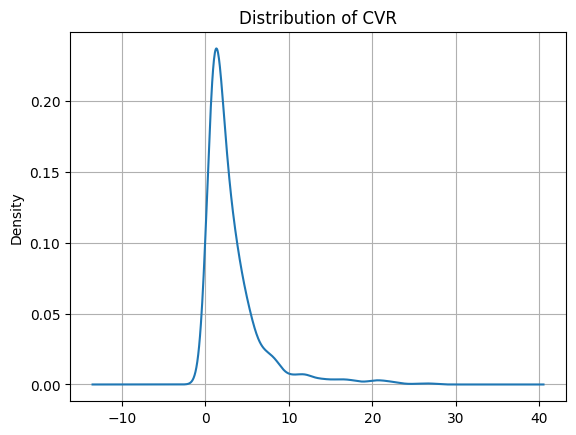

In [35]:
df_filtered_outliers['CVR'].plot(kind='kde', grid=True, title='Distribution of CVR')

# **Exploratory Data Analysis (EDA)**

In [36]:
df_filtered_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1861 entries, 1 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1861 non-null   int64         
 1   Year_Birth           1861 non-null   int64         
 2   Education            1861 non-null   object        
 3   Marital_Status       1861 non-null   object        
 4   Income               1861 non-null   float64       
 5   Kidhome              1861 non-null   int64         
 6   Teenhome             1861 non-null   int64         
 7   Dt_Customer          1861 non-null   datetime64[ns]
 8   Recency              1861 non-null   int64         
 9   MntCoke              1861 non-null   int64         
 10  MntFruits            1861 non-null   int64         
 11  MntMeatProducts      1861 non-null   int64         
 12  MntFishProducts      1861 non-null   int64         
 13  MntSweetProducts     1861 non-null   i

## Statistical Summary

In [37]:
df_filtered_outliers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Group', 'Num_Child', 'Membership_Duration',
       'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR'],
      dtype='object')

In [38]:
new_nums_cols = ['Age', 'Num_Child', 'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR']
new_cats_cols = ['Age_Group']

desc_cols = ['Income', 'Recency', 'Membership_Duration', 'Age', 'Num_Child', 'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR']

# Additional column grouping only for easily visible comparison
product_spending_cols = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase_type_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

In [39]:
# Product spending desc
df_filtered_outliers[product_spending_cols + ['Total_Spending']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MntCoke,1861.0,250929.607738,315826.131031,0.0,18000.0,100000.0,390000.0,1493000.0
MntFruits,1861.0,17241.805481,29502.972217,0.0,1000.0,5000.0,19000.0,199000.0
MntMeatProducts,1861.0,97452.982268,124804.873802,0.0,13000.0,42000.0,132000.0,553000.0
MntFishProducts,1861.0,25399.247716,42295.989533,0.0,2000.0,8000.0,28000.0,258000.0
MntSweetProducts,1861.0,13378.291241,18221.128038,0.0,1000.0,6000.0,18000.0,81000.0
MntGoldProds,1861.0,36454.594304,45760.957987,0.0,7000.0,19000.0,43000.0,262000.0
Total_Spending,1861.0,440856.528748,477667.786596,5000.0,57000.0,231000.0,734000.0,2231000.0


In [40]:
# Product spending desc (sum)
pd.DataFrame(df_filtered_outliers[product_spending_cols + ['Total_Spending']].sum().rename('Sum'))

,Sum
MntCoke,466980000
MntFruits,32087000
MntMeatProducts,181360000
MntFishProducts,47268000
MntSweetProducts,24897000
MntGoldProds,67842000
Total_Spending,820434000


In [41]:
# Purchase type desc
df_filtered_outliers[purchase_type_cols + ['Total_Purchases']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NumDealsPurchases,1861.0,2.465879,1.865228,0.0,1.0,2.0,3.0,15.0
NumWebPurchases,1861.0,3.787211,2.619379,0.0,2.0,3.0,6.0,11.0
NumCatalogPurchases,1861.0,2.002687,2.328527,0.0,0.0,1.0,3.0,10.0
NumStorePurchases,1861.0,5.309511,3.066794,0.0,3.0,4.0,7.0,13.0
Total_Purchases,1861.0,13.565287,7.418566,0.0,7.0,12.0,20.0,35.0


In [42]:
# Purchase type desc (sum)
pd.DataFrame(df_filtered_outliers[purchase_type_cols + ['Total_Purchases']].sum().rename('Sum'))

,Sum
NumDealsPurchases,4589
NumWebPurchases,7048
NumCatalogPurchases,3727
NumStorePurchases,9881
Total_Purchases,25245


In [43]:
df_filtered_outliers[desc_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,1861.0,4.699597e+07,1.856569e+07,1730000.0,33178000.00,46102000.0,61209000.0,105471000.0
Recency,1861.0,4.867544e+01,2.893846e+01,0.0,24.00,49.0,74.0,99.0
Membership_Duration,1861.0,1.095809e+01,6.834176e-01,10.0,10.00,11.0,11.0,12.0
Age,1861.0,5.500430e+01,1.146692e+01,28.0,47.00,54.0,64.0,84.0
Num_Child,1861.0,1.081677e+00,7.212538e-01,0.0,1.00,1.0,1.0,3.0
Total_Acc_Camp,1861.0,2.299839e-01,5.743472e-01,0.0,0.00,0.0,0.0,4.0
Total_Spending,1861.0,4.408565e+05,4.776678e+05,5000.0,57000.00,231000.0,734000.0,2231000.0
Total_Purchases,1861.0,1.356529e+01,7.418566e+00,0.0,7.00,12.0,20.0,35.0
CVR,1861.0,3.285562e+00,3.657562e+00,0.0,1.12,2.0,4.0,27.0


**Major Findings:**

- The majority of customers have an income of Rp46,999,597 per year.
- Most customers will shop again approximately 1.5 months after their last purchase.
- The majority of customers have been members for 11 years.
- Most customers have only one child.
- The majority of customers make 12 purchase transactions, with the highest number through Store Purchase.
- Most customers spend Rp.231,000, with the highest spending on Coke.
- The majority of customers did not receive the campaign.
- The conversion rate from web visits to purchases for the majority of customers is only 2.0%.

In [44]:
df_filtered_outliers[cats_cols + new_cats_cols].describe(exclude='int64').transpose()

,count,unique,top,freq
Education,1861,5,S1,914
Marital_Status,1861,6,Menikah,725
Age_Group,1861,3,Middle Adult,1045


In [45]:
df_filtered_outliers[date_cols].describe().transpose()

,count,mean,min,25%,50%,75%,max
Dt_Customer,1861,2013-07-15 00:58:48.425577728,2012-07-30 00:00:00,2013-01-22 00:00:00,2013-07-17 00:00:00,2014-01-05 00:00:00,2014-06-29 00:00:00


## Univariate Analysis

In [46]:
len(desc_cols)

9

In [47]:
df_filtered_outliers.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Num_Child,Membership_Duration,Total_Acc_Camp,Total_Spending,Total_Purchases,CVR
2202,11133,1973,S3,Lajang,48432000.0,0,1,2012-10-18,3,322000,3000,50000,4000,3000,42000,5,7,1,6,8,0,0,0,0,0,0,3,11,1,51,Middle Adult,1,12,0,424000,19,2.38
851,9477,1954,S3,Menikah,65324000.0,0,1,2014-01-11,0,384000,0,102000,21000,32000,5000,3,6,2,9,4,0,0,0,0,0,0,3,11,0,70,Senior Adult,1,10,0,544000,20,5.00
134,5290,1964,S3,Menikah,41551000.0,1,1,2013-08-14,51,220000,0,33000,3000,0,23000,5,5,1,5,8,0,0,0,0,0,0,3,11,0,60,Senior Adult,2,11,0,279000,16,2.00
666,8754,1974,S3,Bertunangan,45068000.0,0,1,2013-05-16,25,14000,0,3000,0,0,3000,1,1,0,2,7,0,0,0,0,0,0,3,11,0,50,Middle Adult,1,11,0,20000,4,0.57
937,1204,1970,S3,Menikah,67536000.0,0,1,2013-05-22,45,1253000,0,447000,23000,71000,35000,3,11,5,11,8,0,0,0,1,0,0,3,11,0,54,Middle Adult,1,11,1,1829000,30,3.75
746,7235,1975,D3,Menikah,17003000.0,1,0,2013-12-09,37,2000,5000,12000,4000,8000,7000,3,2,0,4,5,0,0,0,0,0,0,3,11,0,49,Middle Adult,1,11,0,38000,9,1.80
216,7264,1978,D3,Lajang,52195000.0,2,1,2014-05-12,2,12000,0,4000,0,0,1000,1,1,0,2,8,0,0,0,0,0,0,3,11,0,46,Middle Adult,3,10,0,17000,4,0.50
302,10812,1978,S3,Menikah,46377000.0,1,0,2014-03-01,89,37000,0,46000,4000,3000,0,1,2,1,3,4,0,0,0,0,0,0,3,11,0,46,Middle Adult,1,10,0,90000,7,1.75
604,1177,1966,S2,Bertunangan,49618000.0,1,1,2013-01-26,77,80000,3000,26000,4000,2000,14000,4,3,1,3,7,0,0,0,0,0,0,3,11,0,58,Middle Adult,2,11,0,129000,11,1.57
1125,5995,1962,S1,Cerai,39552000.0,1,1,2012-12-18,54,165000,3000,147000,4000,24000,41000,7,6,2,5,8,0,0,0,0,0,0,3,11,1,62,Senior Adult,2,12,0,384000,20,2.50


### Numerical Columns

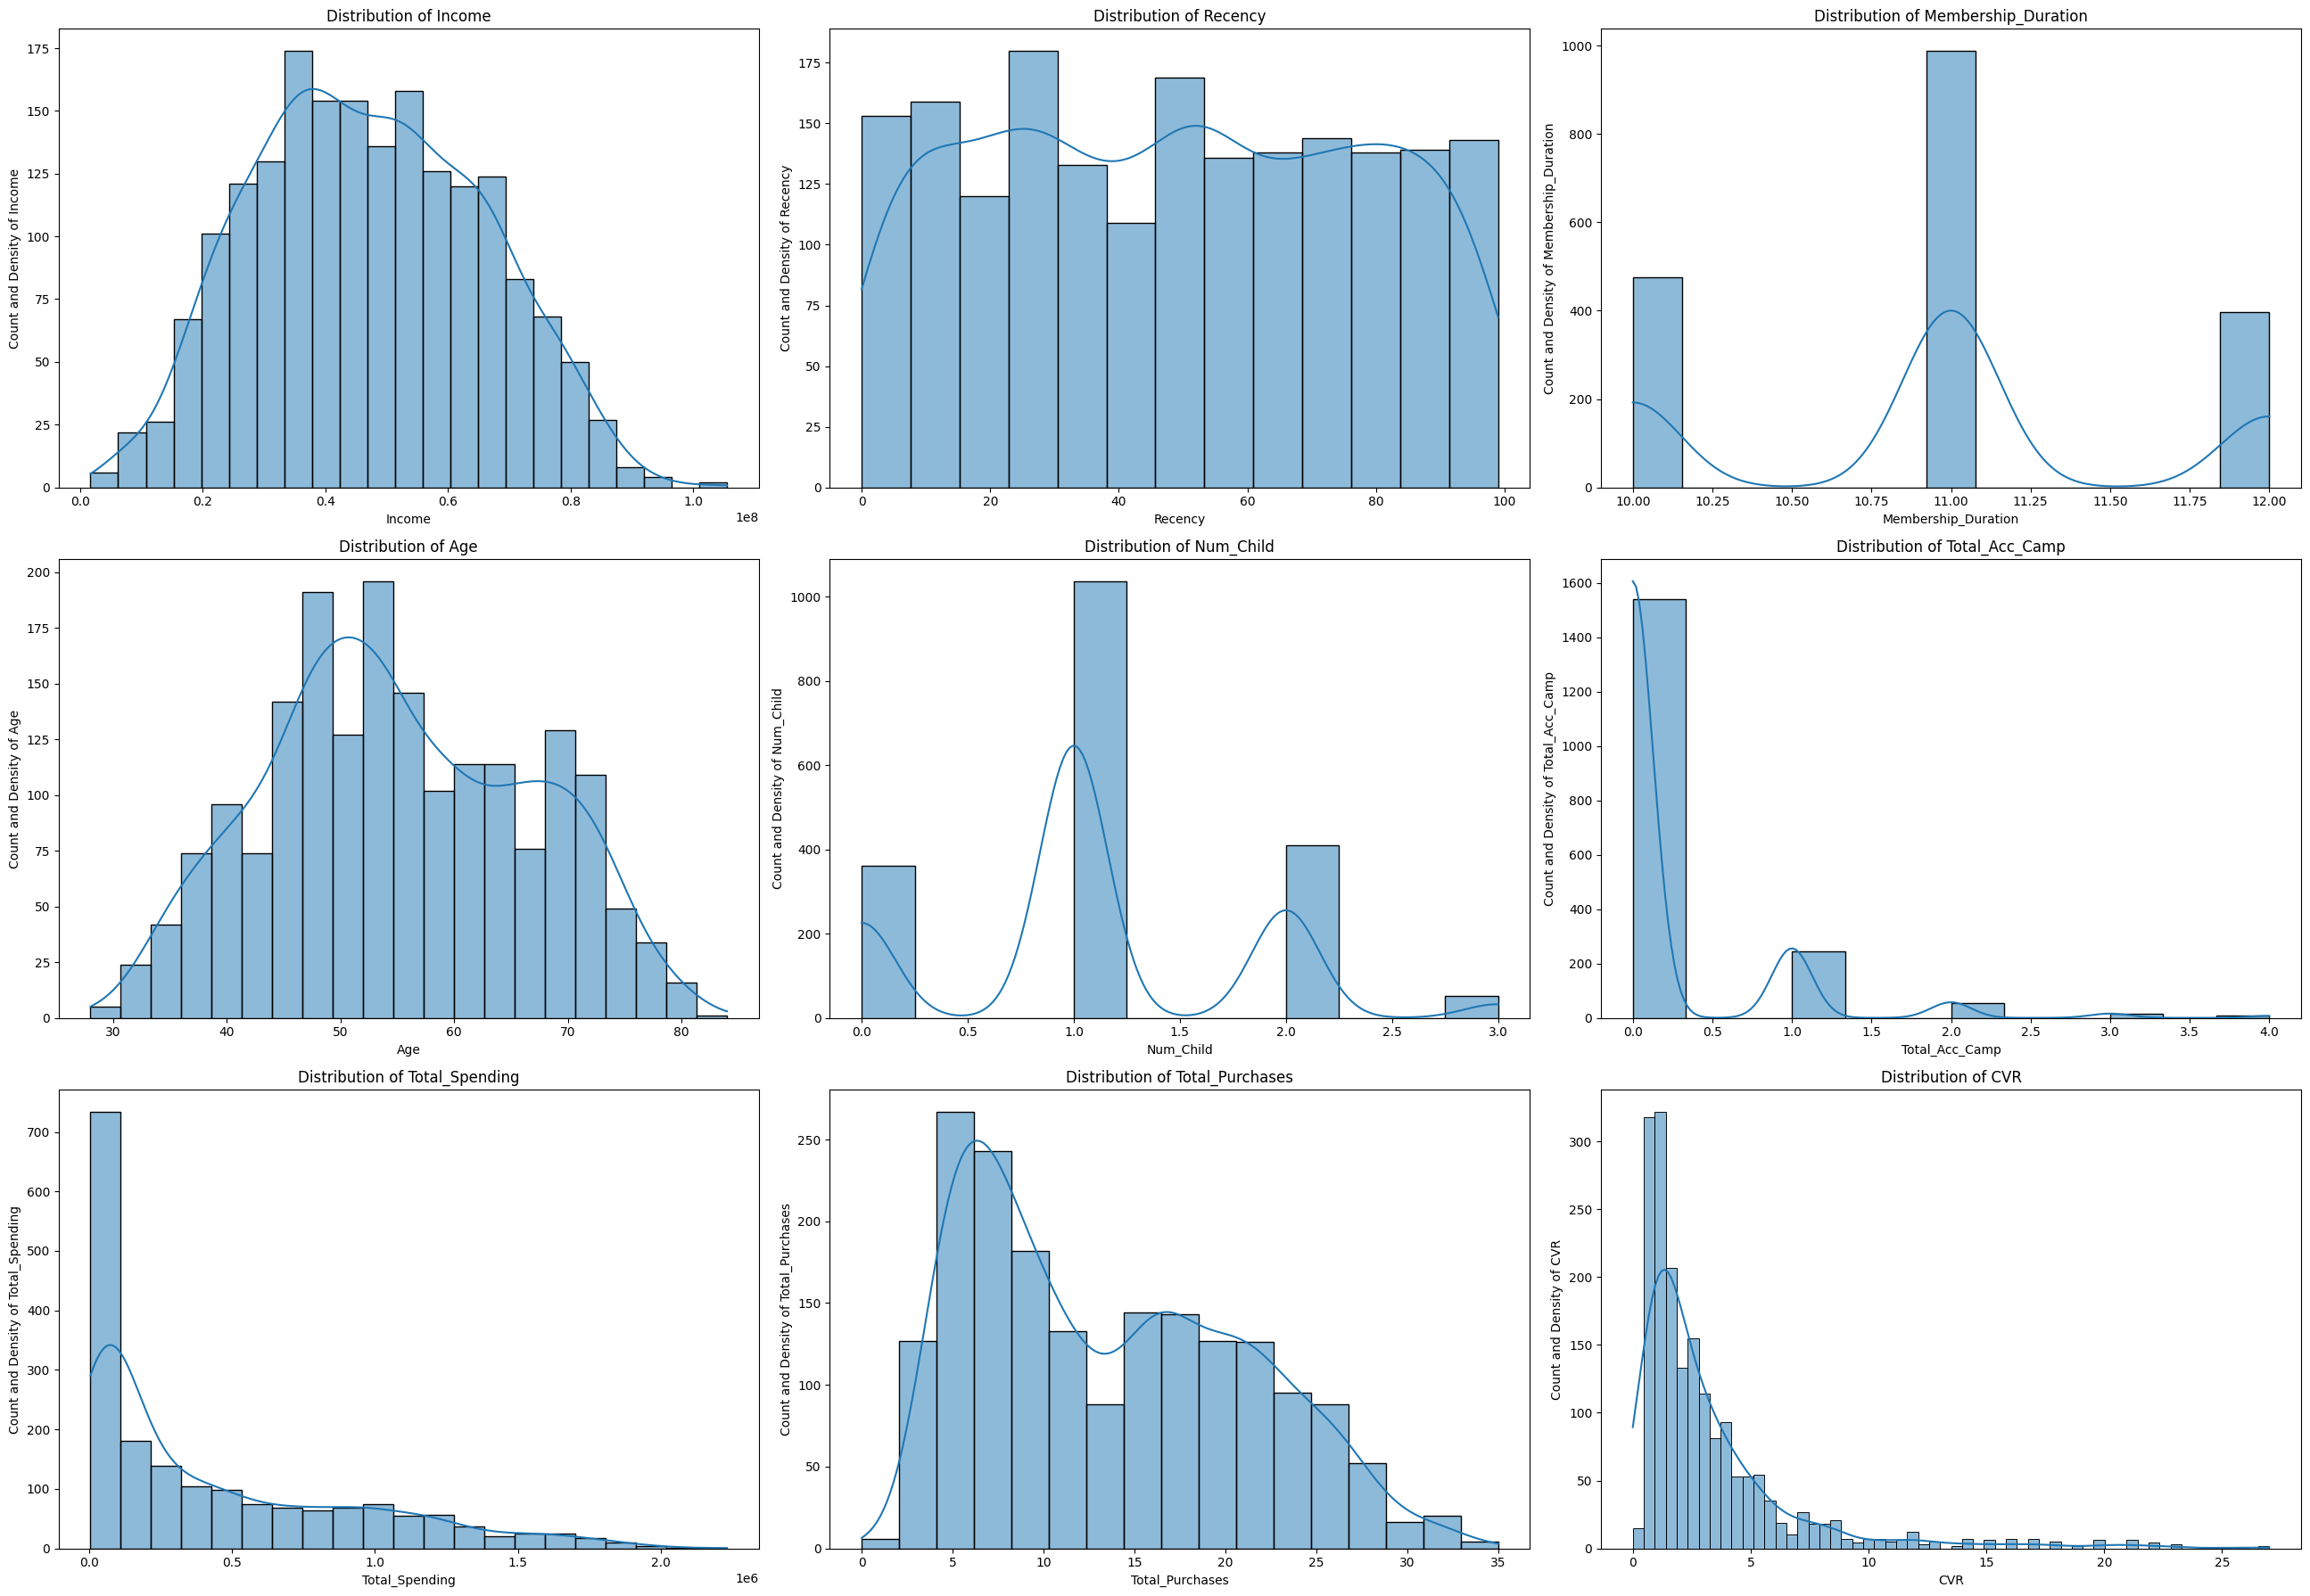

In [48]:
# Hisplot with kde
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(26, 18))
ax = ax.flatten()

for i in range(len(desc_cols)) :
  sns.histplot(data = df_filtered_outliers, ax=ax[i], x=desc_cols[i], kde=True)
  ax[i].set_title(f'Distribution of {desc_cols[i]}')
  ax[i].set_ylabel(f'Count and Density of {desc_cols[i]}')
  ax[i].set_xlabel(f'{desc_cols[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_filtered_outliers.columns) < len(ax) :
    ax[len(df_filtered_outliers.columns)].remove()

plt.tight_layout()
plt.show()

In [49]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols + new_nums_cols:
    data = df_filtered_outliers[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols + new_nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Z_CostContact', 'Z_Revenue']), 'Type of Distribution'] = 'Uniform Distribution'
dist.loc[dist['Column Name'].isin(['Kidhome', 'Teenhome']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

,Column Name,Skewness,Kurtosis,Type of Distribution
0,Year_Birth,-0.110,-0.793,Normal Distribution (Symmetric)
1,Income,0.127,-0.648,Normal Distribution (Symmetric)
2,Kidhome,0.380,-0.960,Bimodal Distribution
3,Teenhome,0.239,-1.020,Bimodal Distribution
4,Recency,0.018,-1.203,Normal Distribution (Symmetric)
5,MntCoke,1.531,1.771,Highly Positively Skewed
6,MntFruits,2.979,10.288,Highly Positively Skewed
7,MntMeatProducts,1.756,2.372,Highly Positively Skewed
8,MntFishProducts,2.675,7.653,Highly Positively Skewed
9,MntSweetProducts,1.789,2.571,Highly Positively Skewed


Distribution types of each column can be seen in above dataframe.

### Categorical Columns

In [50]:
len(df_filtered_outliers[cats_cols].columns)

10

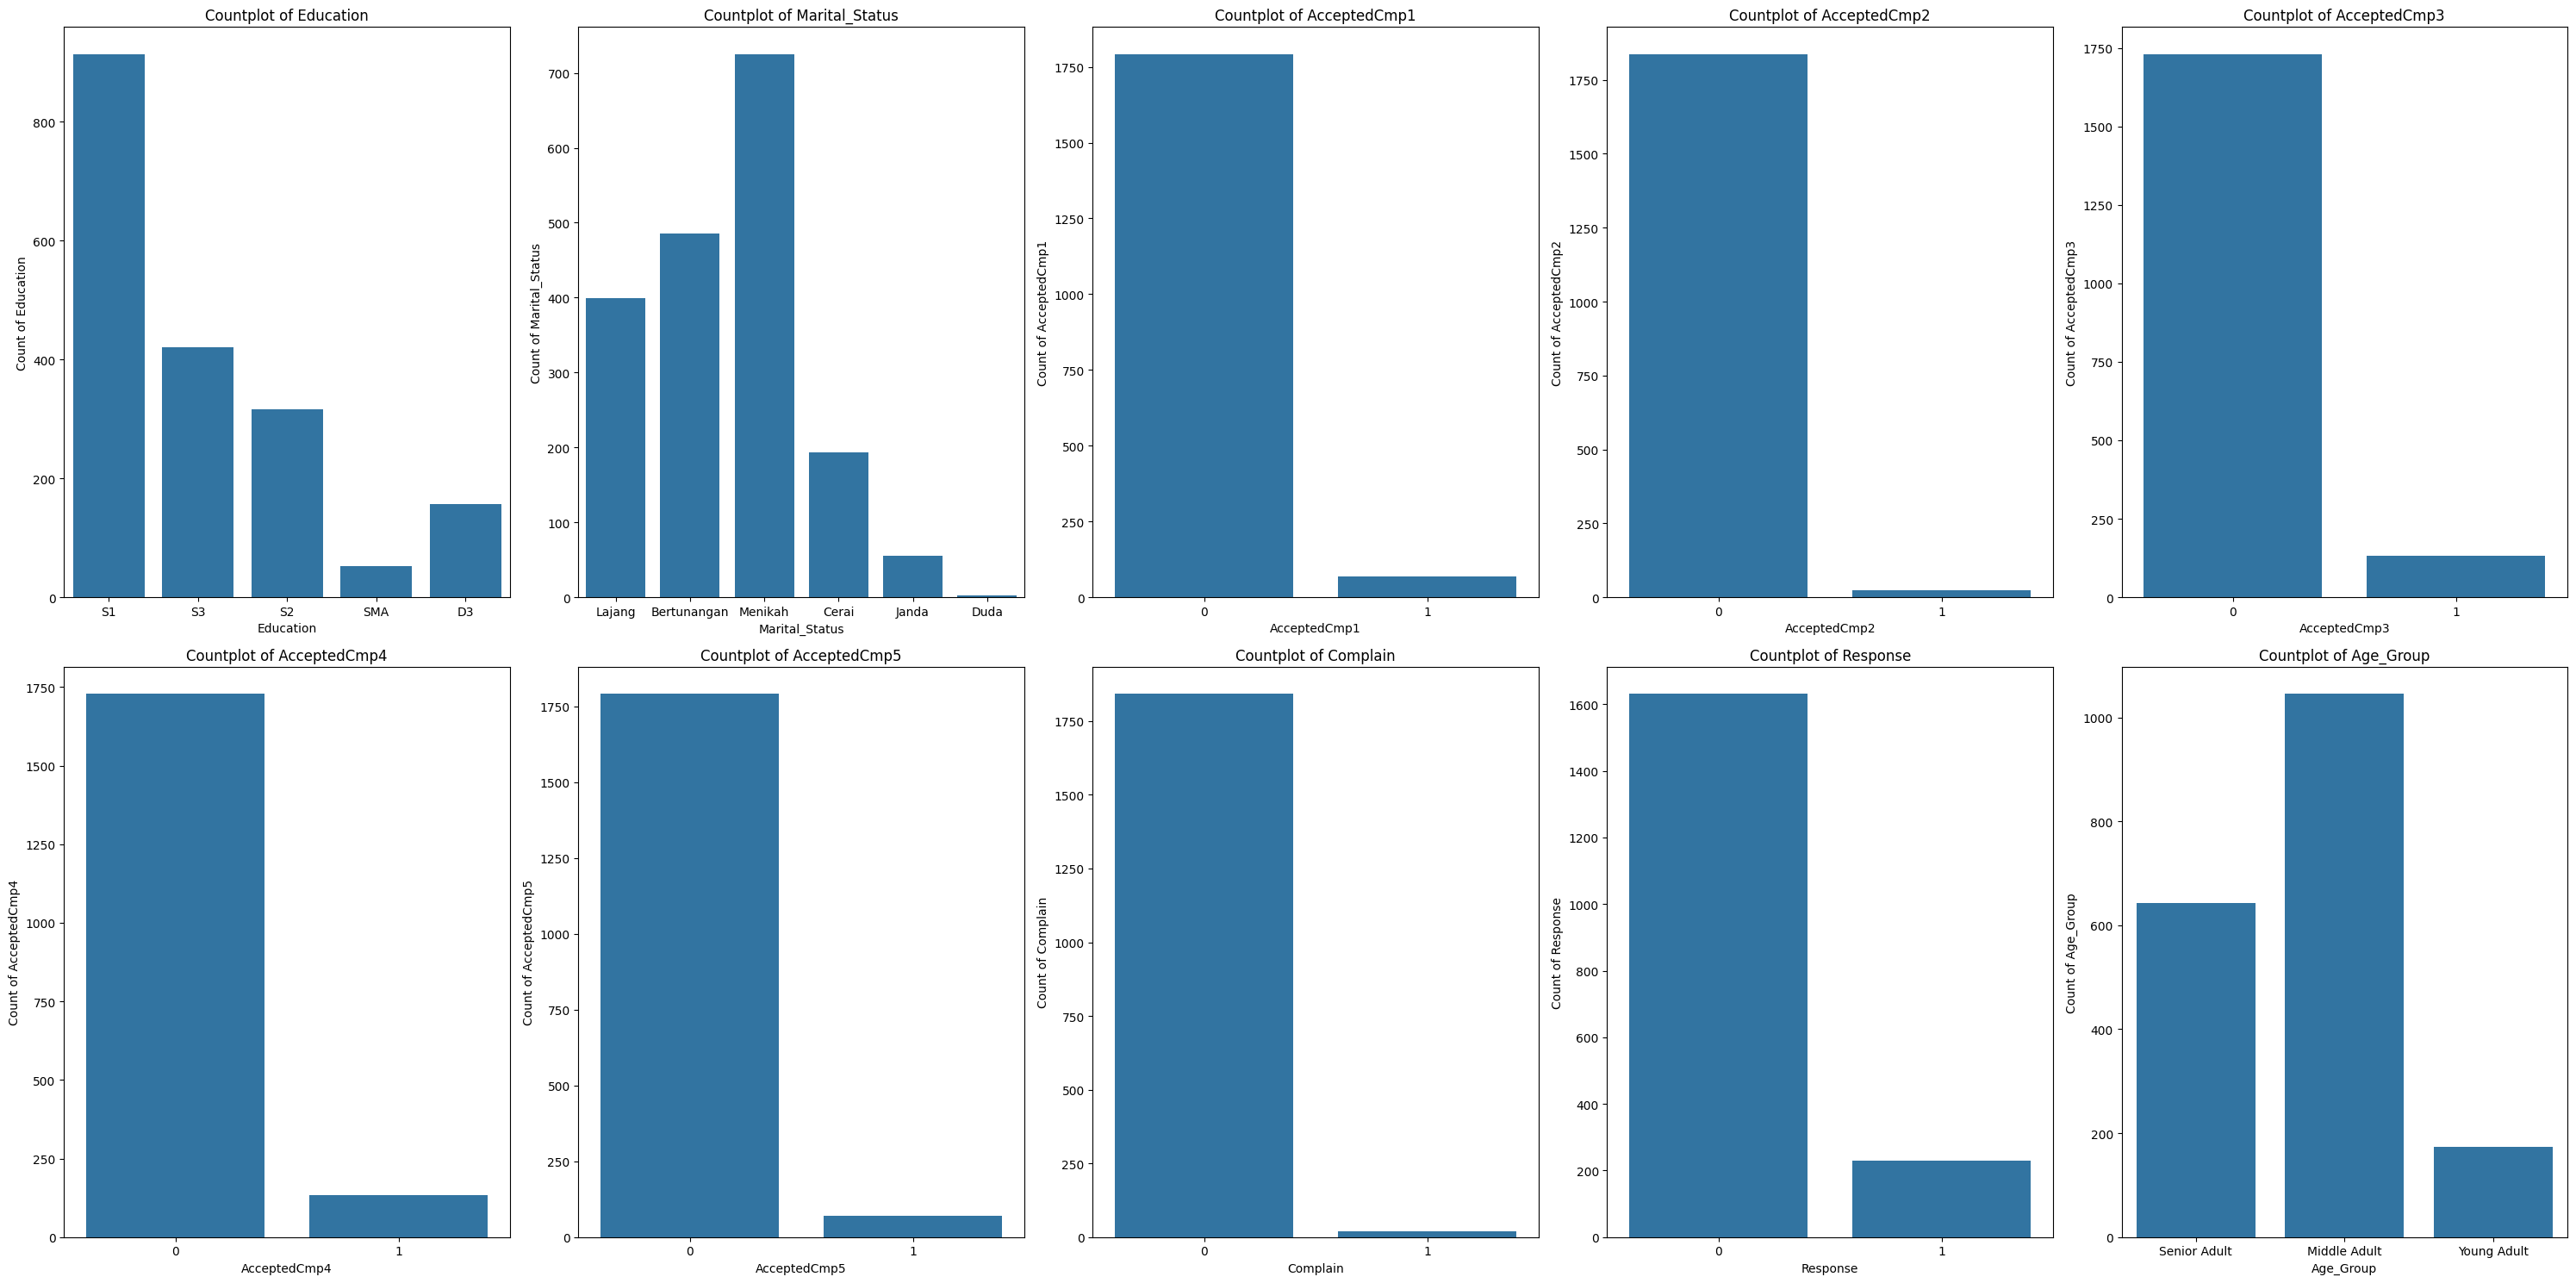

In [51]:
# Coutplot
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,15))
ax = ax.flatten()

cats_cols_excluding_id = [col for col in cats_cols if col != 'ID']
cats_cols_excluding_id.extend(new_cats_cols)

for i in range(len(cats_cols_excluding_id)) :
    sns.countplot(data=df_filtered_outliers, ax=ax[i], x=cats_cols_excluding_id[i])
    ax[i].set_title(f'Countplot of {cats_cols_excluding_id[i]}')
    ax[i].set_ylabel(f'Count of {cats_cols_excluding_id[i]}')
    ax[i].set_xlabel(f'{cats_cols_excluding_id[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_filtered_outliers.columns) < len(ax) :
    ax[len(df_filtered_outliers.columns)].remove()

plt.tight_layout()
plt.show()

**Major Findings :**

- The majority of customers have at least a Bachelor's degree.
- The majority of customers are married.
- The majority of customers do not file complaints.
- The majority of customers do not respond to the campaign.
- The majority of customers are middle adults (age 40-60).

## Bivariate Analysis

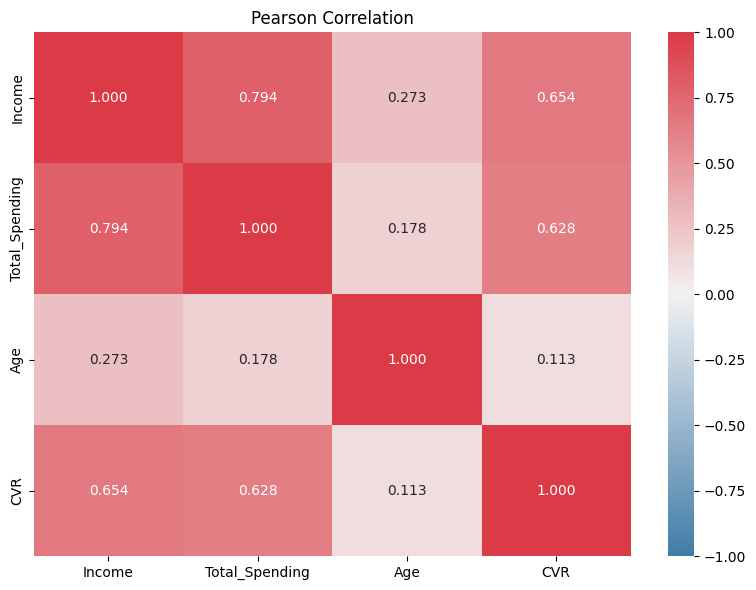

In [52]:
# Correlation heatmap of numerical features and target

included_col = ['Income', 'Total_Spending', 'Age', 'CVR']
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)

# Plot correlation heatmap with Pearson method
plt.figure(figsize=(8,6))
sns.heatmap(data=df_filtered_outliers[included_col].corr(), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.title('Pearson Correlation')

plt.tight_layout()
plt.show()

**Major Findings :**

- Most of the features have positive correlation to each other.
- `Income` and `Total_Spending` have high/strong positive correlation to `CVR` while `Age` have low/weak positive correlation to `CVR`.

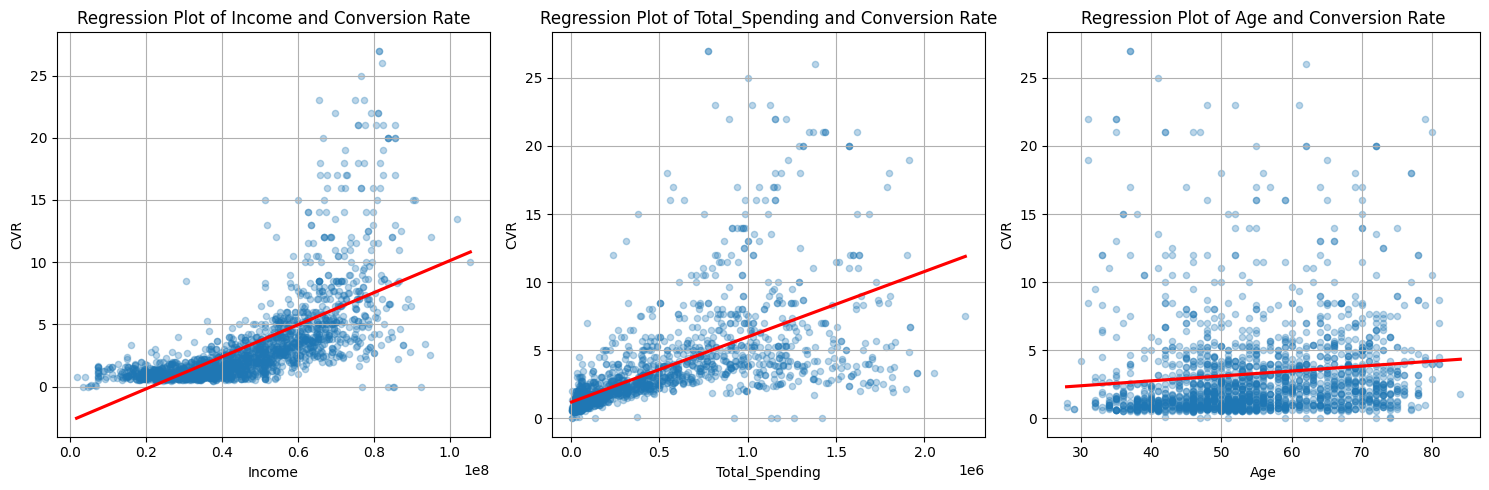

In [53]:
# Regplot of CVR vs Income, Total Spending, and Age

included_col = ['Income', 'Total_Spending', 'Age']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax = ax.flatten()

for i in range(len(included_col)):
    sns.regplot(data=df_filtered_outliers, ax=ax[i], x=included_col[i], y='CVR', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)
    ax[i].set_title(f'Regression Plot of {included_col[i]} and Conversion Rate')
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Overall, income and total spending have a positive correlation with purchase conversion rate (CVR).
    - This means that the higher the income and total spending, the higher the likelihood of conversion or purchase from potential consumers.
    - This positive correlation may be caused by several factors, such as better financial ability to meet the needs or desires of customers, as well as a high perceived value of the products or services offered. Therefore, companies can pay attention to and optimize their marketing strategies by considering target audiences with higher incomes and total spending, thereby increasing conversion opportunities and the overall success of marketing campaigns.

- Meanwhile, age features tend to have a non-significant correlation with the conversion rate. This means that age is not a dominant factor influencing consumer decisions to convert or make purchases.

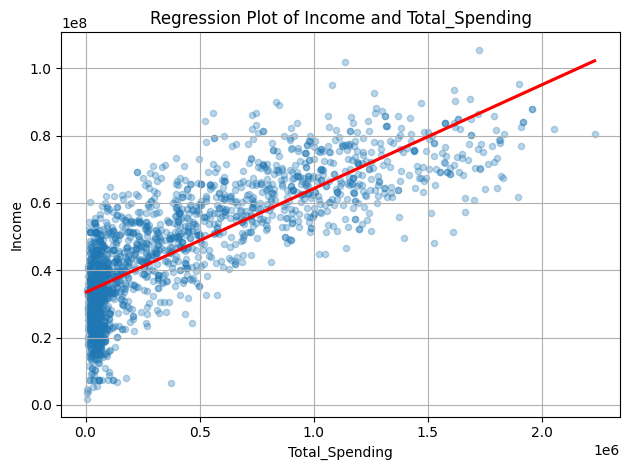

In [54]:
# Regplot of Income vs Total Spending

sns.regplot(data=df_filtered_outliers, x='Total_Spending', y='Income', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)
plt.title(f'Regression Plot of Income and Total_Spending')
plt.grid(True)
    
plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Income and total spending have a strong positive correlation.
- This indicates a significant relationship between an individual's income level and their spending patterns. The higher someone's income, the more likely they are to have higher spending.

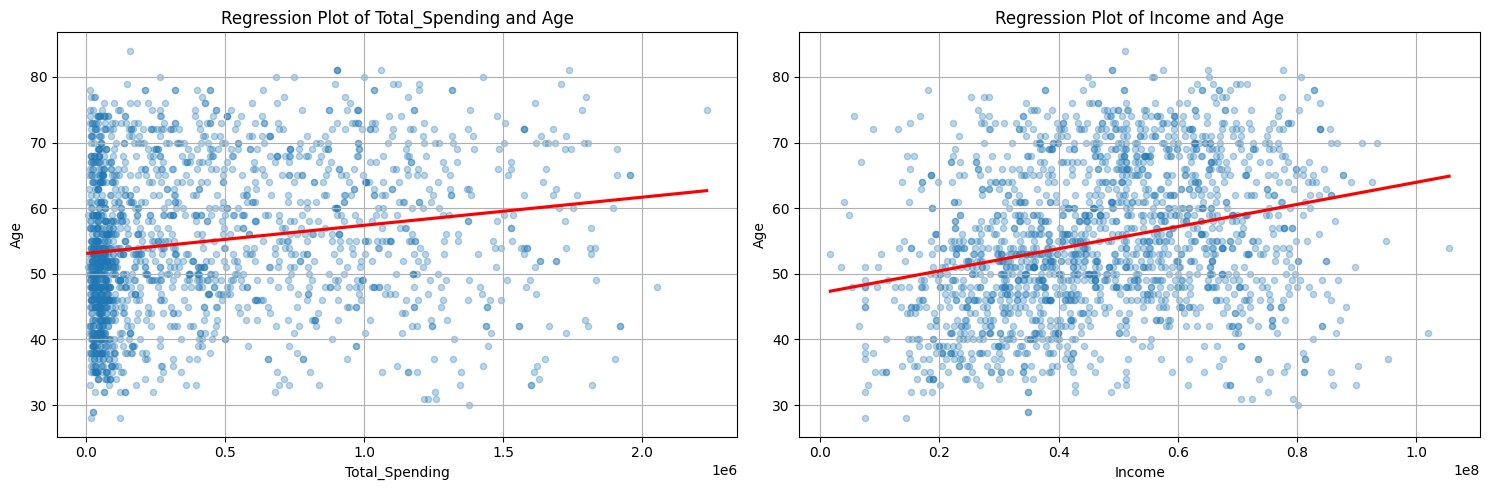

In [55]:
# Regplot of Age vs Total Spending and Income

included_col = ['Total_Spending', 'Income']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()

for i in range(len(included_col)):
    sns.regplot(data=df_filtered_outliers, ax=ax[i], x=included_col[i], y='Age', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)
    ax[i].set_title(f'Regression Plot of {included_col[i]} and Age')
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Age has a weak positive correlation and even lacks significant correlation with the income (Income) or total spending features.
- This means that age does not directly influence an individual's income level or spending patterns. However, companies still need to consider age as part of their marketing strategy. Although the weak correlation suggests that age may not be a primary determinant factor in consumer decisions.

## Multivariate Analysis

<Figure size 1500x1500 with 0 Axes>

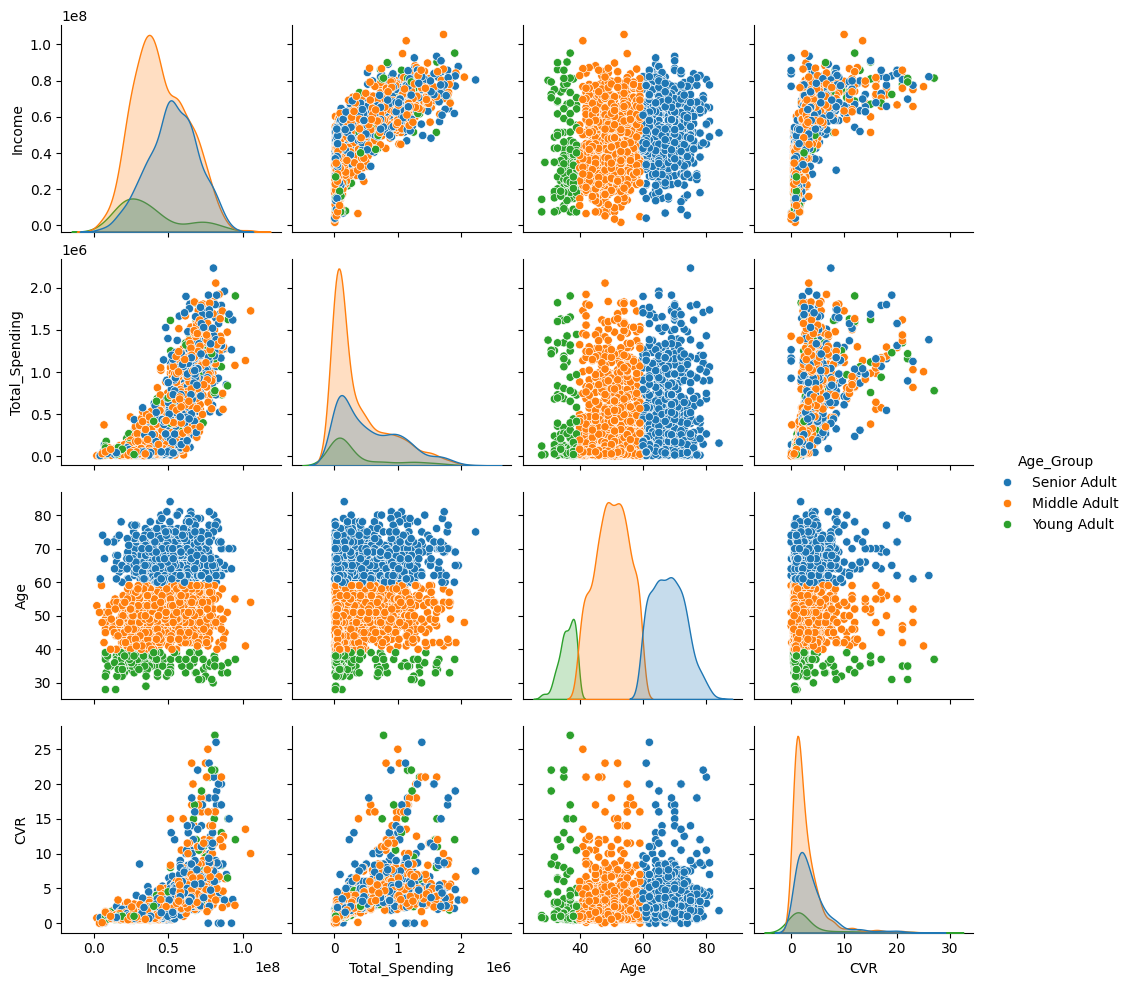

In [56]:
# Pairplot with hue Age Group
plt.figure(figsize=(15,15))

included_col = ['Income', 'Total_Spending', 'Age', 'CVR']

sns.pairplot(data=df_filtered_outliers[included_col +['Age_Group']], hue='Age_Group', diag_kind='kde')
plt.show()

There aren't any interesting insights or significant patterns from the separation of Age Group between Income, Total Spending, and CVR. This further indicates that age may not be the dominant factor influencing the relationship between Income, Total Spending, and the conversion rate (CVR).

# **Task 2 : Data Pre-Processing**